# Weather Big Data Contest 2021

### Yonsei University - Hyunjoo Kim, Jiwon Im, Hyejin Eum

## Exploratory Data Analysis of Geographic Data

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import itertools

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.rcParams['figure.figsize'] = (10, 10)

### Data Description
#### South Korea's administrative districts are organized as follows: do (province) > si/gun/gu (city/county/district) > eup/myeon/dong (town/village/neighborhood) (similar to USA's state > city > town)
#### Gyeongsang-do is located in the southeast of South Korea, consisting of two do-s: Gyeongsanbuk-do(North Gyeongsang), and Gyeongsangnam-do(South Gyeongsang).

umd.shp: Eup(u), Myeon(m), Dong(d)

TB_FGDI_FS_IJ5000_PG_47_1.shp: toyang_gb1 - soil map geo-information1 of Gyeongsangbuk-do

TB_FGDI_FS_IJ5000_PG_47_2.shp: toyang_gb2 - soil map geo-information2 of Gyeongsangbuk-do

TB_FGDI_FS_IJ5000_PG_48.shp: toyang_gn - soil map geo-information of Gyeongsangnam-do

TB_FGDI_FS_IM5000_47_1.shp: imsang_gb1 = forest map geo-information1 of Gyeongsangbuk-do

TB_FGDI_FS_IM5000_47_2.shp: imsang_gb2 = forest map geo-information2 of Gyeongsangbuk-do

TB_FGDI_FS_IJ5000_PG_48.shp: imsang_gn - forest map geo-information of Gyeongsangnam-do

In [2]:
umd = 'umd.shp'
umd = gpd.read_file(umd, encoding = 'utf-8')
umd.shape

(637, 4)

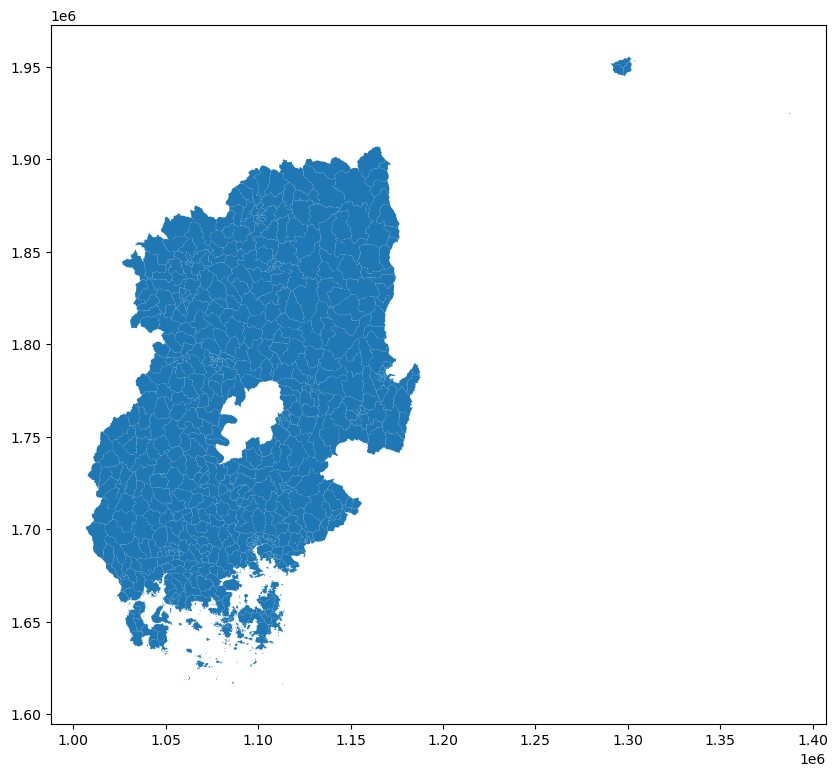

In [3]:
umd.plot()
plt.show()

In [4]:
# Divide into Gyeongsangbuk-do, Gyeongsangnam-do
umd_gb = umd.iloc[:332,:] # Gyeongbuk
umd_gn = umd.iloc[332:,:] # Gyeongnam

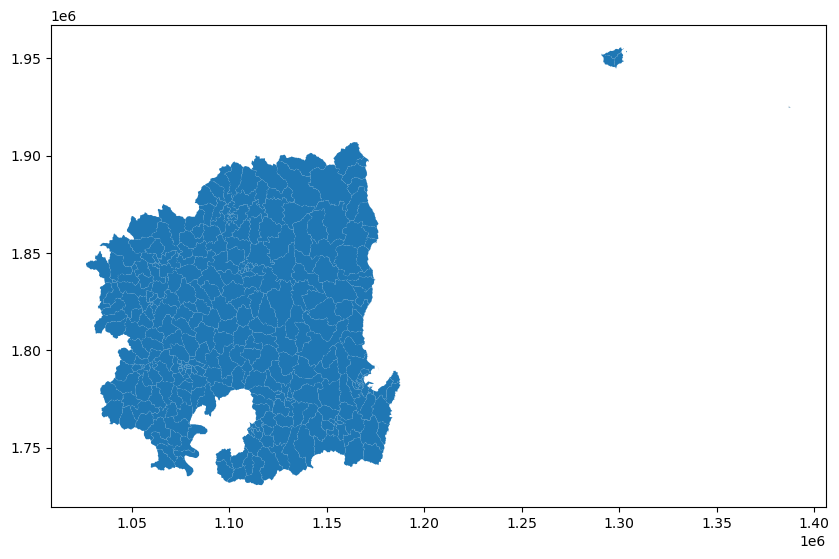

In [5]:
umd_gb.plot()
plt.show()

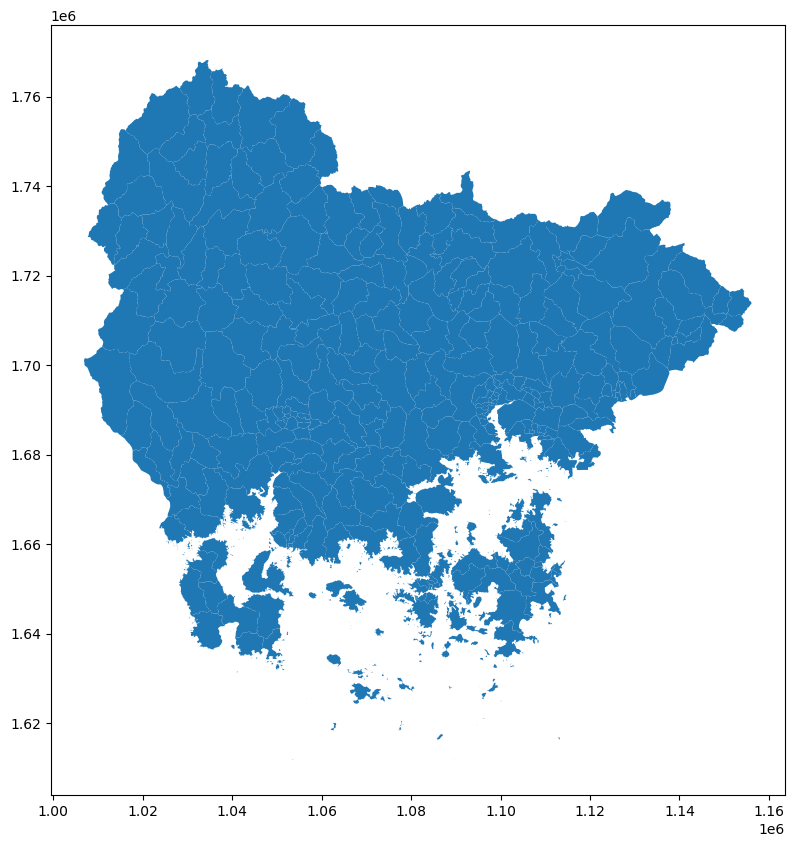

In [6]:
umd_gn.plot()
plt.show()

## 1. Soil Map

In [7]:
# read files: Soil map geo-information(polygon) of Gyeongbuk
toyang_gb1 = 'TB_FGDI_FS_IJ5000_PG_47_1.shp'
toyang_gb1 = gpd.read_file(toyang_gb1, encoding = 'utf-8')
toyang_gb2 = 'TB_FGDI_FS_IJ5000_PG_47_2.shp'
toyang_gb2 = gpd.read_file(toyang_gb2, encoding = 'utf-8')

toyang_gn = 'TB_FGDI_FS_IJ5000_PG_48.shp'
toyang_gn = gpd.read_file(toyang_gn, encoding = 'utf-8')
toyang_gn['OBJ_ID'] = range(349378, 574136)

toyang = pd.concat([toyang_gb1, toyang_gb2, toyang_gn], axis=0, ignore_index=True)
print(toyang.shape)

(574135, 18)


In [8]:
toyang_geo = toyang.loc[:,'geometry']
toyang['geometry'].crs # default: 5179

<Derived Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
# Extract soil map information indices contained within each umd & Reorganize the soil-related dataframe
# We can observe that the extracted indices exclusively represent information pertaining to
# each individual town(umd) and do not extend beyond their respective boundaries into other areas.
toyang_list = []
for i in range(0,637):
    toyang_match = toyang_geo.within(umd.loc[i,'geometry'])
    toyang_index = toyang_match[toyang_match==True]
    toyang_list.append(toyang_index.index)
    

toyang_included_data = []
for i in range(0,637):
    data = toyang.loc[toyang_list[i],:]
    data['region'] = umd['ADM_DR_CD'][i]
    # store DataFrame in list
    toyang_included_data.append(data)

toyang_included_data = pd.concat(toyang_included_data)
toyang_included_data.shape

(531033, 19)

In [10]:
# the number of soil information indices for each town(umd)
toyang_count = []
for i in range(0,637):
    toyang_count.append(len(toyang_list[i]))

In [11]:
# Towns(umd) that have no soil information indices
toyang_count_0 = [i for i, x in enumerate(toyang_count) if x==0]

# Towns(umd) that have no soil information(#: 27)
umd.iloc[toyang_count_0,:]

BASE_DATE ADM_DR_CD ADM_DR_NM  \
0    20200630   3701111      구룡포읍   
5    20200630   3701133       장기면   
6    20200630   3701135      호미곶면   
8    20200630   3701156       청림동   
9    20200630   3701157       제철동   
12   20200630   3701160       상대동   
13   20200630   3701161       해도동   
28   20200630   3701268       죽도동   
29   20200630   3702011       감포읍   
33   20200630   3702031       양북면   
41   20200630   3702051       중부동   
50   20200630   3702068       황오동   
108  20200630   3705053      원평2동   
118  20200630   3705065      공단2동   
198  20200630   3710011       하양읍   
201  20200630   3710031       와촌면   
211  20200630   3710056       중방동   
329  20200630   3743011       울릉읍   
330  20200630   3743031        서면   
331  20200630   3743032        북면   
348  20200630   3803065       상평동   
351  20200630   3803068       신안동   
359  20200630   3803076      충무공동   
366  20200630   3805034       욕지면   
368  20200630   3805036       사량면   
456  20200630   3810059       양주동   
504  20200630   3811559        이동   

                                              geometry  
0    MULTIPOLYGON (((1184734.239 1774617.254, 11847...  
5    POLYGON ((1178077.432 1777146.779, 1178116.217...  
6    MULTIPOLYGON (((1187219.232 1784023.930, 11872...  
8    MULTIPOLYGON (((1172875.631 1781952.506, 11728...  
9    MULTIPOLYGON (((1171837.211 1781936.253, 11719...  
12   POLYGON ((1168112.259 1782839.641, 1168112.264...  
13   POLYGON ((1168654.334 1783404.245, 1168671.688...  
28   POLYGON ((1168455.276 1783806.963, 1168456.789...  
29   MULTIPOLYGON (((1179480.710 1751536.956, 11794...  
33   MULTIPOLYGON (((1179645.997 1749988.199, 11796...  
41   POLYGON ((1154139.046 1762853.528, 1154139.079...  
50   POLYGON ((1155010.757 1763149.225, 1155048.024...  
108  POLYGON ((1074990.404 1793423.720, 1075021.871...  
118  POLYGON ((1080698.327 1790789.266, 1080699.264...  
198  POLYGON ((1117255.912 1772466.180, 1117275.303...  
201  POLYGON ((1112451.223 1777833.823, 1112555.008...  
211  POLYGON ((1112087.378 1760848.425, 1112082.477...  
329  MULTIPOLYGON (((1387711.920 1924430.817, 13877...  
330  MULTIPOLYGON (((1297368.816 1945397.494, 12973...  
331  MULTIPOLYGON (((1295660.880 1954076.325, 12956...  
348  POLYGON ((1057421.002 1687250.000, 1057422.968...  
351  POLYGON ((1052000.324 1688426.883, 1052007.400...  
359  POLYGON ((1057890.162 1687975.644, 1057941.907...  
366  MULTIPOLYGON (((1089649.319 1611963.498, 10896...  
368  MULTIPOLYGON (((1066502.144 1641102.303, 10665...  
456  POLYGON ((1139172.719 1706362.526, 1139178.541...  
504  POLYGON ((1109008.315 1685014.274, 1109044.316...

In [12]:
# The total number of soil information indices contained within each town(umd)
toyang_included_count = 0
for i in range(0,637):
    toyang_included_count += len(toyang_list[i])

In [13]:
# Sort after flattening the soil information indices
toyang_list_flatten = list(itertools.chain.from_iterable(toyang_list))
toyang_list_flatten.sort()

toyang_geo_notincluded = toyang_geo.loc[~toyang_geo.index.isin(toyang_list_flatten)]
len(toyang_geo_notincluded)

43102

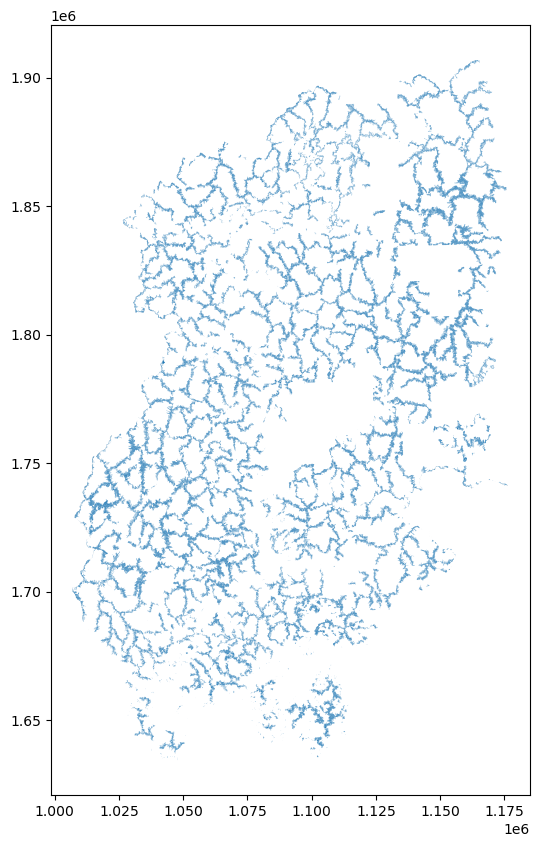

In [14]:
# The soil information that belongs to the boundaries with other areas is still left unclassified.
toyang_geo_notincluded.plot()
plt.show()

In [15]:
## Reclassify approximately 43,000 soil map information, including the boundaries of cities, using geo-information from other cities that share boundaries with the Gyeongsang Provinces.
umd_total = 'bnd_dong_00_2020_2020_2Q.shp'
umd_total = gpd.read_file(umd_total, encoding = 'utf-8')

adm_cd_boundary = pd.read_csv('adm_cd_boundary.csv', encoding = 'cp949')
adm_cd_boundary = pd.DataFrame(adm_cd_boundary['ADM_DR_CD'])

umd_total['ADM_DR_CD']=umd_total['ADM_DR_CD'].astype(int)
adm_cd_boundary['ADM_DR_CD']=adm_cd_boundary['ADM_DR_CD'].astype(int)

umd_boundary_df = pd.merge(adm_cd_boundary, umd_total, how='left', on='ADM_DR_CD')
umd_boundary_df = umd_boundary_df.reindex(columns=['BASE_DATE', 'ADM_DR_CD', 'ADM_DR_NM', 'geometry'])
umd_both = pd.concat([umd, umd_boundary_df], axis=0, ignore_index=True)

In [16]:
# Extract soil information indices located at the boundaries of each town(umd)
toyang_intersect_list = []
for i in range(0,1214):
    toyang_intersect_match = toyang_geo_notincluded.intersects(umd_both.loc[i,'geometry'])
    toyang_intersect_index = toyang_intersect_match[toyang_intersect_match==True]
    toyang_intersect_list.append(toyang_intersect_index.index)
    

# Reorganize the dataframe based on the extracted soil information indices of boundary areas
toyang_notincluded_data = []
for i in range(0,1214):
    data = toyang.loc[toyang_intersect_list[i],:]
    data['region'] = umd_both['ADM_DR_CD'][i]
    # store DataFrame in list
    toyang_notincluded_data.append(data)

toyang_notincluded_data = pd.concat(toyang_notincluded_data)

In [17]:
# the number of soil information indices for each town(umd)
toyang_intersect_count = []
for i in range(0,1214):
    toyang_intersect_count.append(len(toyang_intersect_list[i]))

In [18]:
# Towns(umd) that have no soil information indices
toyang_intersect_count_0 = [i for i, x in enumerate(toyang_intersect_count) if x==0]

# Towns(umd) that have no information (#: 37)
umd_both_noinfo = umd_both.iloc[toyang_intersect_count_0,:]
umd_both_noinfo = umd_both_noinfo.iloc[0:37,]

In [19]:
umd_remove = [2111064, 2111067, 2112056, 2131012, 2131013, 2206071, 2231012,
       2231013, 2231014, 2231016, 2231031, 2231032, 2231036, 2604052,
       2604053, 2604054, 2631013, 2631014, 2631034, 2631036, 2631037,
       2631038, 2631039, 2631040]

In [20]:
toyang_notincluded_data2 = toyang_notincluded_data.loc[~toyang_notincluded_data['region'].isin(umd_remove)]
toyang_notincluded_data.shape

(85324, 19)

In [21]:
## Still handling the remaining rows
len(toyang['OBJ_ID'].unique())

574135

In [22]:
toyang_id = [toyang_included_data['OBJ_ID'].unique(),toyang_notincluded_data2['OBJ_ID'].unique()]
toyang_id_flatten = list(itertools.chain.from_iterable(toyang_id))
toyang_id_flatten_num = pd.to_numeric(toyang_id_flatten)

In [25]:
# The outermost boundary sections remain.
final_notincluded = toyang.loc[~toyang.index.isin(toyang_id_flatten_num)]

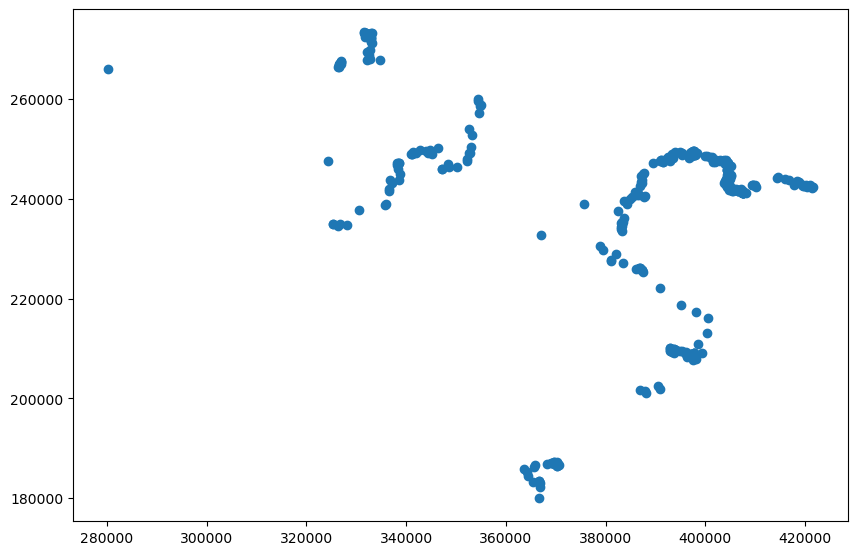

In [26]:
# change the coordinate form
umd_ara = umd['geometry'].to_crs(epsg=5181)

from shapely.geometry import Point, Polygon, MultiPolygon
# load the data of the polygon as a dataframe
final_notincluded_coord = pd.DataFrame(final_notincluded, columns=['ARA_XCRD','ARA_YCRD'])
# to numeric
final_notincluded_coord['ARA_XCRD'] = pd.to_numeric(final_notincluded_coord['ARA_XCRD'])
final_notincluded_coord['ARA_YCRD'] = pd.to_numeric(final_notincluded_coord['ARA_YCRD'])
# make shapely points out of the X and Y coordinates
point_data = [Point(xy) for xy in zip(final_notincluded_coord['ARA_XCRD'], final_notincluded_coord['ARA_YCRD'])]
# assign shapely points as geometry to a geodataframe
# Like this you can also inspect the individual points if needed
final_notincluded_gpd = gpd.GeoDataFrame(final_notincluded_coord, geometry=point_data)

final_notincluded_gpd['geometry'].plot()
plt.show()

In [27]:
# Extract the remaining soil geo-information from the outer boundary by calculating the distance from each town(umd) and matching it with the nearest town
toyang_final_notincluded_list = []
for i in final_notincluded_gpd.index:
    distances_min = umd_ara.distance(final_notincluded_gpd['geometry'][i]).min()
    distances_umd_index = umd_ara[umd_ara.distance(final_notincluded_gpd['geometry'][i])==distances_min].index
    toyang_final_notincluded_list.append(distances_umd_index.values)

In [28]:
toyang_final_notincluded_list_df = pd.DataFrame(toyang_final_notincluded_list, columns=['umd_index'])
toyang_final_notincluded_list_df.set_index(final_notincluded.index, inplace=True)

toyang_final_notincluded_data = pd.concat([final_notincluded, toyang_final_notincluded_list_df], axis=1)

In [29]:
umd2 = umd.copy()
umd2['umd_index'] = range(0,637)
umd2.drop(['BASE_DATE', 'ADM_DR_NM', 'geometry'], axis=1, inplace=True)

toyang_final_notincluded_data2 = pd.merge(toyang_final_notincluded_data, umd2, how='left', on='umd_index')
toyang_final_notincluded_data2.drop(['umd_index'], axis=1, inplace=True)
toyang_final_notincluded_data2.rename(columns={'ADM_DR_CD': 'region'}, inplace=True)

## Combine all
toyang_total = pd.concat([toyang_included_data, toyang_notincluded_data2, toyang_final_notincluded_data2], axis=0, ignore_index=False)

In [30]:
# Towns(umd) that have no information (#: 25)
toyang_noinfo = list(set(umd['ADM_DR_CD']).difference(set(toyang_total['region'])))

# Dataframe of towns(umd) that have no information
toyang_noinfo_index = umd['ADM_DR_CD'].isin(toyang_noinfo)
toyang_noinfo_df = umd.iloc[toyang_noinfo_index[toyang_noinfo_index==True].index,:]

In [ ]:
# toyang_total.to_csv('toyang_final.csv')

### Extract the geo-information of towns(umd) that have no information from the towns(umd) that share the geo-boundaries

In [31]:
toyang_final = pd.read_csv('toyang_final.csv')

noinfoumd_index = [0,5,6,8,9,12,13,28,29,41,50,108,118,198,201,211,329,330,331,348,351,359,366,368,456]
toyang_noinfoumd = umd.iloc[noinfoumd_index,:]

In [32]:
# Extract the indices of umd-s that share geo-boundaries with the umd-s that have no information.
noinfo_intersect_list = []
for i in toyang_noinfoumd.index:
    noinfo_intersect_match = umd.intersects(toyang_noinfoumd.loc[i,'geometry'])
    noinfo_intersect_index = noinfo_intersect_match[noinfo_intersect_match==True]
    noinfo_intersect_list.append(noinfo_intersect_index.index)

In [33]:
toyang_noinfo_filled_data = pd.DataFrame([])

for i in range(0,25):
    intersect_codes = pd.to_numeric(umd.loc[noinfo_intersect_list[i],'ADM_DR_CD'])
    intersect_codes_match = intersect_codes.isin(toyang_final['region'])
    intersect_codes_match_index = intersect_codes_match[intersect_codes_match==True].index
    intersect_codes_match_cd = pd.to_numeric(umd.loc[intersect_codes_match_index,'ADM_DR_CD'].values)
    
    noinfo_filled = toyang_final.loc[toyang_final['region'].isin(intersect_codes_match_cd)]
    noinfo_filled['region'] = toyang_noinfoumd.loc[toyang_noinfoumd.index[i],'ADM_DR_CD']
    toyang_noinfo_filled_data = toyang_noinfo_filled_data.append(noinfo_filled, ignore_index = False)
    
# toyang_noinfo_filled_data.to_csv('toyang_noinfo_filled.csv')    

/var/folders/0x/0qlly95x41d2f03pf55mm_wc0000gn/T/ipykernel_3690/243882750.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noinfo_filled['region'] = toyang_noinfoumd.loc[toyang_noinfoumd.index[i],'ADM_DR_CD']
/var/folders/0x/0qlly95x41d2f03pf55mm_wc0000gn/T/ipykernel_3690/243882750.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toyang_noinfo_filled_data = toyang_noinfo_filled_data.append(noinfo_filled, ignore_index = False)
/var/folders/0x/0qlly95x41d2f03pf55mm_wc0000gn/T/ipykernel_3690/243882750.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [39]:
# Combine with the final version of "toyang_final"
toyang_final2 = pd.concat([toyang_final, toyang_noinfo_filled_data], axis=0, ignore_index=True)
toyang_final2.head()

Unnamed: 0  OBJ_ID   ARA_XCRD   ARA_YCRD  PRRCK_LARG  PRRCK_MDDL  \
0      258224  258225  405978.31  286599.48           2          26   
1      258226  258227  405999.10  286836.97           2          26   
2      258229  258230  406210.62  286138.10           2          26   
3      258230  258231  406212.87  287052.70           2          22   
4      258231  258232  406241.92  286044.07           2          26   

   LOCTN_ALTT  LOCTN_GRDN  EIGHT_AGL  CLZN_CD  TPGRP_TPCD  PRDN_FOM_C  \
0       154.6        10.1      245.2        3         NaN         NaN   
1       176.5         6.2      210.8        3         NaN         NaN   
2       125.7        31.3       58.4        3        12.0         5.0   
3       247.9        13.5      107.4        3         NaN         NaN   
4       132.2        25.8       52.6        3        12.0         5.0   

   SLANT_TYP  SLDPT_TPCD  SCSTX_CD  SLTP_CD LDMARK_STN       MAP_LABEL  \
0        NaN         NaN       NaN       93       L993               C   
1        NaN         NaN       NaN       99       L999               E   
2        2.0        20.0       3.0       16       L416  b'GrB\xa9\xfc'   
3        NaN         NaN       NaN       82       L983               R   
4        2.0        20.0       3.0       16       L416  b'GrB\xa9\xfc'   

                                            geometry   region  
0  POLYGON ((1160871.06684782 1785708.317279747, ...  3701112  
1  POLYGON ((1160907.098505944 1785906.331823462,...  3701112  
2  POLYGON ((1161154.402730082 1785263.635201878,...  3701112  
3  POLYGON ((1161116.21345386 1786159.264560067, ...  3701112  
4  POLYGON ((1161175.92859032 1785204.363853666, ...  3701112

### Generate variables

For the towns(umd) with soil information, use groupby on toyang_final.csv to extract the information.

For the towns(umd) without soil information, use groupby on toyang_noinfo_filled_data.csv to extract the information.

In [40]:
## Reorganize the toyang_final2 data by excluding the information of cities that share the geo-boundaries with Gyeongsang provinces but do not belong to them
umd_remove2 = [3205055, 3207012, 3207035, 3233038,
       3302032, 3303034, 3303035, 3332031, 3332033, 3332040, 3333035,
       3334031, 3334032, 3334033, 3334034, 3334035, 3336033, 3336034,
       3336036, 3338011, 3338031, 3338032, 3338033, 3338034, 3505043,
       3505044, 3505045, 3533031, 3533032, 3533034, 3534032, 3534033,
       3534036, 3606036, 3633033,]

toyang_final3 = toyang_final2.loc[~toyang_final2['region'].isin(umd_remove2)]

#### Selected variables based on the previous research:  PRRCK_LARG, LOCTN_ALTT, LOCTN_GRDN, EIGHT_AGL, SLDPT_TPCD

In [43]:
toyang_vars = toyang_final3.loc[:,['OBJ_ID','PRRCK_LARG', 'PRRCK_MDDL', 'LOCTN_ALTT', 'LOCTN_GRDN', 'EIGHT_AGL',
'CLZN_CD', 'TPGRP_TPCD', 'PRDN_FOM_C', 'SLANT_TYP', 'SLDPT_TPCD', 'SCSTX_CD', 'SLTP_CD', 'LDMARK_STN', 'MAP_LABEL','region']]
toyang_vars_cate = toyang_final3.loc[:,['PRRCK_LARG', 'PRRCK_MDDL', 'CLZN_CD', 'TPGRP_TPCD', 'PRDN_FOM_C', 'SLANT_TYP', 'SLDPT_TPCD', 'SCSTX_CD', 'SLTP_CD', 'LDMARK_STN', 'MAP_LABEL','region']]
toyang_vars_num = toyang_vars.groupby('region')['LOCTN_ALTT', 'LOCTN_GRDN', 'EIGHT_AGL'].describe().reset_index()
toyang_vars_cate = toyang_vars_cate.groupby('region').agg(lambda x:x.value_counts().index[0]).reset_index()

# toyang_vars_num.to_csv('toyang_vars_num.csv')
# toyang_vars_cate.to_csv('toyang_vars_cate.csv')
# Combine in Excel and create "toyang_vars_total.csv"
toyang_vars_total = pd.read_csv('toyang_vars_total.csv')

/var/folders/0x/0qlly95x41d2f03pf55mm_wc0000gn/T/ipykernel_3690/595964150.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  toyang_vars_num = toyang_vars.groupby('region')['LOCTN_ALTT', 'LOCTN_GRDN', 'EIGHT_AGL'].describe().reset_index()


#### Additional data handling for the town(umd) information

In [44]:
data_ul1 = pd.DataFrame(toyang_vars_total.iloc[[333,339],].mean()).transpose()
data_ul2 = pd.DataFrame(toyang_vars_total.iloc[[333,339],].mean()).transpose()
data_ul3 = pd.DataFrame(toyang_vars_total.iloc[[333,339],].mean()).transpose()
data_uls = pd.concat([data_ul1, data_ul2, data_ul3], axis=0)
data_uls['region'] = [3743011, 3743031, 3743032]
data_uls.index = [329, 330, 331]

data_ty1 = pd.DataFrame(toyang_vars_total.iloc[434,:]).transpose()
data_ty1['region'] = 3809057
data_ty1.index = [366]
data_ty2 = pd.DataFrame(toyang_vars_total.iloc[382,:]).transpose()
data_ty2['region'] = 3806053
data_ty2.index = [368]

data_noinfo_total = pd.concat([data_uls, data_ty1, data_ty2], axis=0)
toyang_vars_total_filled = pd.concat([toyang_vars_total, data_noinfo_total], axis=0)

# toyang_vars_total_filled.to_csv('toyang_vars_total_filled.csv')

/var/folders/0x/0qlly95x41d2f03pf55mm_wc0000gn/T/ipykernel_3690/4003549635.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_ul1 = pd.DataFrame(toyang_vars_total.iloc[[333,339],].mean()).transpose()
/var/folders/0x/0qlly95x41d2f03pf55mm_wc0000gn/T/ipykernel_3690/4003549635.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_ul2 = pd.DataFrame(toyang_vars_total.iloc[[333,339],].mean()).transpose()
/var/folders/0x/0qlly95x41d2f03pf55mm_wc0000gn/T/ipykernel_3690/4003549635.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select on

In [46]:
toyang_vars_total_filled = pd.read_csv('toyang_vars_total_filled.csv')
toyang_vars_total_filled.head(10)

region  LOCTN_ALTT_mean  LOCTN_ALTT_std  LOCTN_ALTT_min  LOCTN_ALTT_25  \
0  3701111        65.757325       34.147189             8.9         38.900   
1  3701112        83.386694       42.255435             9.7         54.400   
2  3701113       454.022807       81.027138           309.4        381.300   
3  3701131       408.980000       54.566754           338.3        372.300   
4  3701132        65.757325       34.147189             8.9         38.900   
5  3701133       203.412146      191.343948             8.9         53.850   
6  3701135        65.757325       34.147189             8.9         38.900   
7  3701155         1.687500        0.524915             1.0          1.375   
8  3701156       169.173832      179.378078             8.9         47.625   
9  3701157       126.064029      128.627554             1.0         55.975   

   LOCTN_ALTT_50  LOCTN_ALTT_75  LOCTN_ALTT_max  LOCTN_GRDN_mean  \
0          63.80         85.800           153.0        19.230573   
1          77.20        102.300           330.2        17.570478   
2         453.60        538.800           645.0        22.608772   
3         413.70        455.100           465.5        14.290000   
4          63.80         85.800           153.0        19.230573   
5          93.80        381.300           689.8        21.039676   
6          63.80         85.800           153.0        19.230573   
7           1.60          1.875             2.7         1.225000   
8          80.50        331.300           645.0        20.130374   
9          82.35        120.000           645.0        17.792806   

   LOCTN_GRDN_std  LOCTN_GRDN_min  LOCTN_GRDN_25  LOCTN_GRDN_50  \
0        8.316193             0.8         14.000          18.50   
1        8.362573             0.7         11.600          16.30   
2        9.010832             5.1         17.000          24.00   
3        2.824673            11.1         12.200          14.05   
4        8.316193             0.8         14.000          18.50   
5        9.010994             0.8         15.700          20.40   
6        8.316193             0.8         14.000          18.50   
7        0.914565             0.3          0.750           1.05   
8        8.616224             0.8         14.025          19.30   
9        8.684323             0.3         11.575          16.60   

   LOCTN_GRDN_75  LOCTN_GRDN_max  EIGHT_AGL_mean  EIGHT_AGL_std  \
0         23.700            46.2      219.421656     115.366353   
1         21.900            45.8      175.756965      91.652124   
2         28.500            38.4      183.407017      90.399530   
3         15.900            18.2      214.790000      28.786473   
4         23.700            46.2      219.421656     115.366353   
5         28.500            46.2      215.127126     107.392527   
6         23.700            46.2      219.421656     115.366353   
7          1.375             3.1      209.700000      98.722193   
8         25.875            46.2      209.828972     110.231122   
9         23.200            45.8      177.731655      90.950843   

   EIGHT_AGL_min  EIGHT_AGL_25  EIGHT_AGL_50  EIGHT_AGL_75  EIGHT_AGL_max  \
0            2.0       108.500        262.40       317.000          357.9   
1            0.5        97.700        171.70       250.800          359.5   
2           70.0       106.000        177.00       226.400          358.8   
3          176.0       185.150        224.60       239.525          240.5   
4            2.0       108.500        262.40       317.000          357.9   
5            2.0       106.000        246.70       309.850          358.8   
6            2.0       108.500        262.40       317.000          357.9   
7           45.9       154.100        249.50       256.475          346.8   
8            2.0       106.000        226.40       312.000          358.8   
9            0.5       100.775        175.55       247.850          359.5   

   PRRCK_LARG  PRRCK_MDDL  CLZN_CD  TPGRP_TPCD  PRDN_FOM_C  SLANT_TYP  \

### Visualization based on the organized dataframe

In [47]:
from geopandas import GeoDataFrame
toyang_final3_geo = GeoDataFrame(toyang_final3)

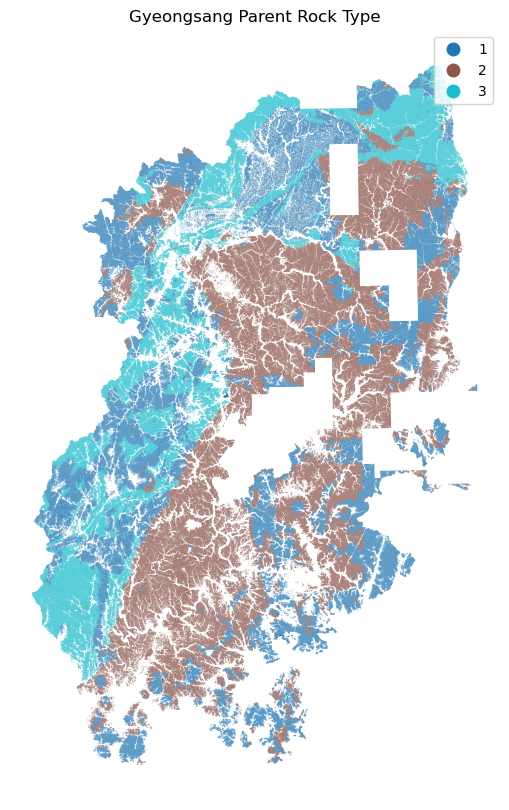

In [48]:
# parent rock type
toyang_prt = toyang.plot(column='PRRCK_LARG', legend=True, categorical=True)
toyang_prt.set_axis_off()
toyang_prt.set_title("Gyeongsang Parent Rock Type")
plt.show()

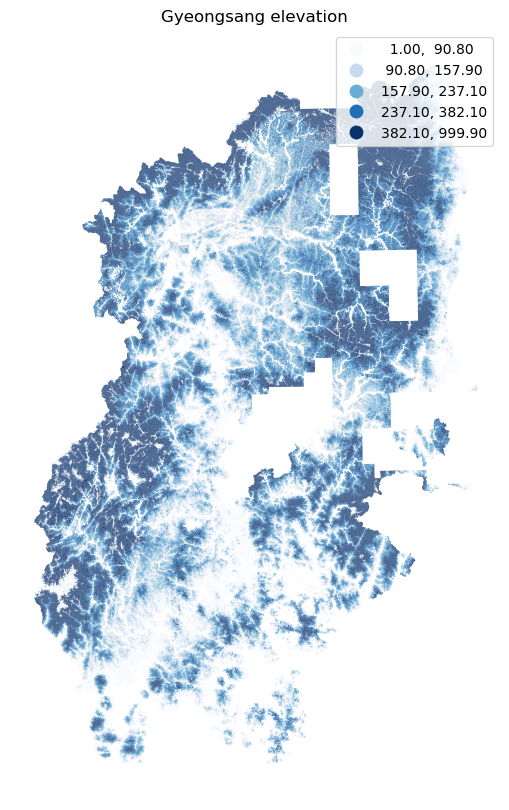

In [49]:
# elevation
toyang_elev = toyang.plot(column='LOCTN_ALTT', legend=True, scheme='quantiles', cmap="Blues", k=5)
toyang_elev.set_axis_off()
toyang_elev.set_title("Gyeongsang elevation")
plt.show()

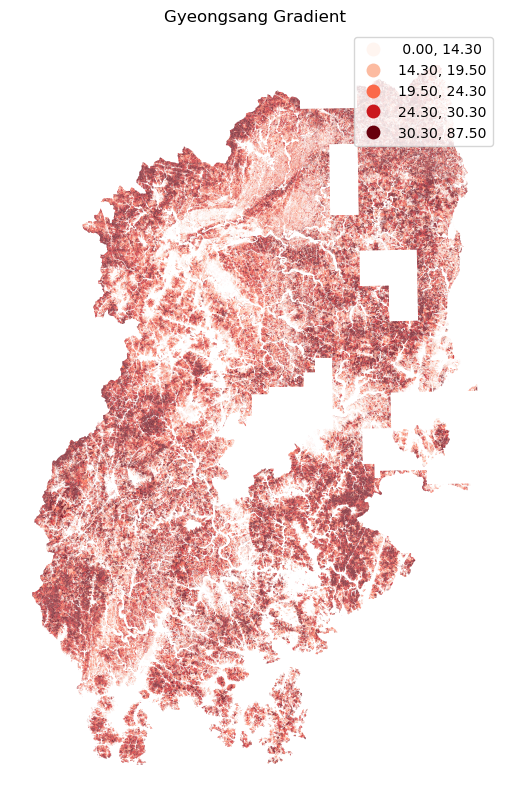

In [50]:
# gradient
toyang_grdnt = toyang.plot(column='LOCTN_GRDN', legend=True, scheme='quantiles', cmap="Reds", k=5)
toyang_grdnt.set_axis_off()
toyang_grdnt.set_title("Gyeongsang Gradient")
plt.show()

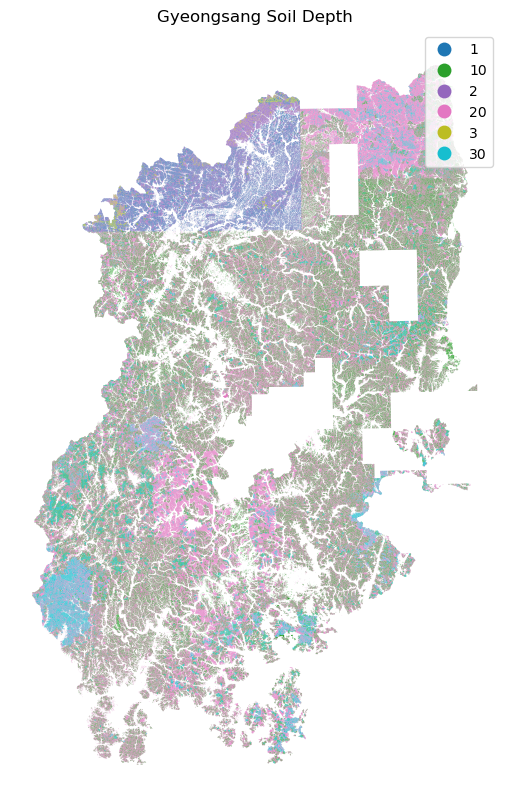

In [51]:
# Depth of soil
toyang_sd = toyang.plot(column='SLDPT_TPCD', legend=True, categorical=True)
toyang_sd.set_axis_off()
toyang_sd.set_title("Gyeongsang Soil Depth")
plt.show()

## 2. Soil drain grade

In [52]:
# read file
soil = 'Z_SIS_ASIT_SOILDRA_AREA.shp'
soil = gpd.read_file(soil, encoding = 'utf-8')
soil['geometry'].crs = "EPSG:5181"
soil['geometry'].crs
soil['geometry'] = soil['geometry'].to_crs(epsg=5179)

In [53]:
soil_geo = soil.loc[:,'geometry']

# Extract soil map information indices contained within each umd & Reorganize the soil-related dataframe
# We can observe that the extracted indices exclusively represent information pertaining to
# each individual town(umd) and do not extend beyond their respective boundaries into other areas.
soil_list = []
for i in range(0,637):
    soil_match = soil_geo.within(umd.loc[i,'geometry'])
    soil_index = soil_match[soil_match==True]
    soil_list.append(soil_index.index)
    
soil_included_data = []
for i in range(0,637):
    data = soil.loc[soil_list[i],:]
    data['region'] = umd['ADM_DR_CD'][i]
    # store DataFrame in list
    soil_included_data.append(data)

soil_included_data = pd.concat(soil_included_data)

In [54]:
# the number of soil drain grade information indices for each town(umd)
soil_count = []
for i in range(0,637):
    soil_count.append(len(soil_list[i]))

In [55]:
# Towns(umd) that have no soil drain grade information indices
soil_count_0 = [i for i, x in enumerate(soil_count) if x==0]

In [56]:
# The total number of soil drain grade information indices contained within each town(umd)
soil_included_count = 0
for i in range(0,637):
    soil_included_count += len(soil_list[i])

In [57]:
# Sort after flattening the soil drain grade information indices
soil_list_flatten = list(itertools.chain.from_iterable(soil_list))
soil_list_flatten.sort()

soil_geo_notincluded = soil_geo.loc[~soil_geo.index.isin(soil_list_flatten)]

In [58]:
umd_total = 'bnd_dong_00_2020_2020_2Q.shp'
umd_total = gpd.read_file(umd_total, encoding = 'utf-8')

adm_cd_boundary = pd.read_csv('adm_cd_boundary.csv', encoding = 'cp949')
adm_cd_boundary = pd.DataFrame(adm_cd_boundary['ADM_DR_CD'])

umd_total['ADM_DR_CD']=umd_total['ADM_DR_CD'].astype(int)
adm_cd_boundary['ADM_DR_CD']=adm_cd_boundary['ADM_DR_CD'].astype(int)

umd_boundary_df = pd.merge(adm_cd_boundary, umd_total, how='left', on='ADM_DR_CD')

umd_boundary_df = umd_boundary_df.reindex(columns=['BASE_DATE', 'ADM_DR_CD', 'ADM_DR_NM', 'geometry'])

umd_both = pd.concat([umd, umd_boundary_df], axis=0, ignore_index=True)

In [59]:
# Extract soil drain grade information indices located at the boundaries of each town(umd)
soil_intersect_list = []
for i in range(0,637):
    soil_intersect_match = soil_geo_notincluded.intersects(umd.loc[i,'geometry'])
    soil_intersect_index = soil_intersect_match[soil_intersect_match==True]
    soil_intersect_list.append(soil_intersect_index.index)
    
# Reorganize the dataframe based on the extracted soil drain grade information indices of boundary areas
soil_notincluded_data = []
for i in range(0,637):
    data = soil.loc[soil_intersect_list[i],:]
    data['region'] = umd['ADM_DR_CD'][i]
    # store DataFrame in list
    soil_notincluded_data.append(data)

soil_notincluded_data = pd.concat(soil_notincluded_data)

In [61]:
# the number of soil drain grade information indices for each town(umd)
soil_intersect_count = []
for i in range(0,637):
    soil_intersect_count.append(len(soil_intersect_list[i]))

In [62]:
# Towns(umd) that have no soil drain grade information indices
soil_intersect_count_0 = [i for i, x in enumerate(soil_intersect_count) if x==0]

# Towns(umd) that have no information (#: 3)
umd_noinfo = umd.iloc[soil_intersect_count_0,:]
soil_total = pd.concat([soil_included_data, soil_notincluded_data], axis=0, ignore_index=False)

In [63]:
soil_noinfo = list(set(umd['ADM_DR_CD']).difference(set(soil_total['region'])))
soil_total = soil_total.drop(['AREA', 'PERIMETER', 'OBJECTID'], axis=1)

# soil_total.to_csv('soil_final.csv')

In [64]:
soil_final = pd.read_csv('soil_final.csv')
soil_final.drop(['Unnamed: 0'], axis=1, inplace=True)

soil_final['SOILDRA'].unique()

array([1, 3, 2, 4, 5, 7, 6])

In [65]:
# b'\xb8\xc5\xbf\xec\xbe\xe7\xc8\xa3': Very good (1)
# b'\\xbe\\xe7\\xc8\\xa3': good (2)
# b'\xbe\xe0\xb0\xa3\xbe\xe7\xc8\xa3': moderately good (3)
# b'\\xbe\\xe0\\xb0\\xa3\\xba\\xd2\\xb7\\xae': moderately bad(4)
# b'\xba\xd2\xb7\xae': bad (5)
# b'\xb8\xc5\xbf\xec\xba\xd2\xb7\xae': Very bad (6)
# b'\xb1\xe2\xc5\xb8': etc (7)

soil_final['SOILDRA'] = soil_final['SOILDRA'].replace(["b'\\xb8\\xc5\\xbf\\xec\\xbe\\xe7\\xc8\\xa3'"],1)
soil_final['SOILDRA'] = soil_final['SOILDRA'].replace(["b'\\xbe\\xe7\\xc8\\xa3'"],2)
soil_final['SOILDRA'] = soil_final['SOILDRA'].replace(["b'\\xbe\\xe0\\xb0\\xa3\\xbe\\xe7\\xc8\\xa3'"],3)
soil_final['SOILDRA'] = soil_final['SOILDRA'].replace(["b'\\xbe\\xe0\\xb0\\xa3\\xba\\xd2\\xb7\\xae'"],4)
soil_final['SOILDRA'] = soil_final['SOILDRA'].replace(["b'\\xba\\xd2\\xb7\\xae'"],5)
soil_final['SOILDRA'] = soil_final['SOILDRA'].replace(["b'\\xb8\\xc5\\xbf\\xec\\xba\\xd2\\xb7\\xae'"],6)
soil_final['SOILDRA'] = soil_final['SOILDRA'].replace(["b'\\xb1\\xe2\\xc5\\xb8'"],7)

In [66]:
# soil_final.to_csv('soil_final.csv')

soil_final = pd.read_csv('soil_final.csv')

#### Additional data handling for the town(umd) information

In [67]:
data_ul1 = pd.DataFrame(toyang_vars_total.iloc[[333,339],].mean()).transpose()
data_ul2 = pd.DataFrame(toyang_vars_total.iloc[[333,339],].mean()).transpose()
data_ul3 = pd.DataFrame(toyang_vars_total.iloc[[333,339],].mean()).transpose()
data_uls = pd.concat([data_ul1, data_ul2, data_ul3], axis=0)
data_uls['region'] = [3743011, 3743031, 3743032]
data_uls.index = [329, 330, 331]

data_ty1 = pd.DataFrame(toyang_vars_total.iloc[434,:]).transpose()
data_ty1['region'] = 3809057
data_ty1.index = [366]
data_ty2 = pd.DataFrame(toyang_vars_total.iloc[382,:]).transpose()
data_ty2['region'] = 3806053
data_ty2.index = [368]

/var/folders/0x/0qlly95x41d2f03pf55mm_wc0000gn/T/ipykernel_3690/1123648917.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_ul1 = pd.DataFrame(toyang_vars_total.iloc[[333,339],].mean()).transpose()
/var/folders/0x/0qlly95x41d2f03pf55mm_wc0000gn/T/ipykernel_3690/1123648917.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_ul2 = pd.DataFrame(toyang_vars_total.iloc[[333,339],].mean()).transpose()
/var/folders/0x/0qlly95x41d2f03pf55mm_wc0000gn/T/ipykernel_3690/1123648917.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select on

In [68]:
data_noinfo_total = pd.concat([data_uls, data_ty1, data_ty2], axis=0)
toyang_vars_total_filled = pd.concat([toyang_vars_total, data_noinfo_total], axis=0)
# toyang_vars_total_filled.to_csv('toyang_vars_total_filled.csv')

In [69]:
toyang_vars_total_filled.head()

region LOCTN_ALTT_mean LOCTN_ALTT_std LOCTN_ALTT_min LOCTN_ALTT_25  \
0  3701111       65.757325      34.147189            8.9          38.9   
1  3701112       83.386694      42.255435            9.7          54.4   
2  3701113      454.022807      81.027138          309.4         381.3   
3  3701131          408.98      54.566754          338.3         372.3   
4  3701132       65.757325      34.147189            8.9          38.9   

  LOCTN_ALTT_50 LOCTN_ALTT_75 LOCTN_ALTT_max LOCTN_GRDN_mean LOCTN_GRDN_std  \
0          63.8          85.8          153.0       19.230573       8.316193   
1          77.2         102.3          330.2       17.570478       8.362573   
2         453.6         538.8          645.0       22.608772       9.010832   
3         413.7         455.1          465.5           14.29       2.824673   
4          63.8          85.8          153.0       19.230573       8.316193   

  LOCTN_GRDN_min LOCTN_GRDN_25 LOCTN_GRDN_50 LOCTN_GRDN_75 LOCTN_GRDN_max  \
0            0.8          14.0          18.5          23.7           46.2   
1            0.7          11.6          16.3          21.9           45.8   
2            5.1          17.0          24.0          28.5           38.4   
3           11.1          12.2         14.05          15.9           18.2   
4            0.8          14.0          18.5          23.7           46.2   

  EIGHT_AGL_mean EIGHT_AGL_std EIGHT_AGL_min EIGHT_AGL_25 EIGHT_AGL_50  \
0     219.421656    115.366353           2.0        108.5        262.4   
1     175.756965     91.652124           0.5         97.7        171.7   
2     183.407017      90.39953          70.0        106.0        177.0   
3         214.79     28.786473         176.0       185.15        224.6   
4     219.421656    115.366353           2.0        108.5        262.4   

  EIGHT_AGL_75 EIGHT_AGL_max PRRCK_LARG PRRCK_MDDL CLZN_CD TPGRP_TPCD  \
0        317.0         357.9          2         25       4          7   
1        250.8         359.5          2         22       3          7   
2        226.4         358.8          1         11       3         12   
3      239.525         240.5          1         12       3         12   
4        317.0         357.9          2         25       4          7   

  PRDN_FOM_C SLANT_TYP SLDPT_TPCD SCSTX_CD SLTP_CD LDMARK_STN       MAP_LABEL  
0          5         2         20        2       2       L102    b'B\xa9\xfc'  
1          5         2         20        2      16       L416  b'GrB\xa9\xfc'  
2          1         1         10        2       1       L101    b'B\xa9\xfb'  
3          1         1         10        1       1       L101    b'B\xa9\xfb'  
4          5         2         20        2       2       L102    b'B\xa9\xfc'

## 3. Forestry map

In [70]:
# read files
imsang_gb1 = 'TB_FGDI_FS_IM5000_47_1.shp'
imsang_gb1 = gpd.read_file(imsang_gb1, encoding = 'utf-8')
imsang_gb2 = 'TB_FGDI_FS_IM5000_47_2.shp'
imsang_gb2 = gpd.read_file(imsang_gb2, encoding = 'utf-8')

imsang_gn = 'TB_FGDI_FS_IM5000_48.shp'
imsang_gn = gpd.read_file(imsang_gn, encoding = 'utf-8')

imsang_gb1['ID'] = range(0,433195)
imsang_gb2['ID'] = range(433195,789041)
imsang_gn['ID'] = range(789041,1143094)

imsang_gb1.set_index('ID', inplace=True)
imsang_gb2.set_index('ID', inplace=True)
imsang_gn.set_index('ID', inplace=True)

imsang = pd.concat([imsang_gb1, imsang_gb2, imsang_gn], axis=0, ignore_index=True)
imsang_geo = imsang.loc[:,'geometry']
imsang['geometry'].crs # 기본: 5179

<Derived Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [71]:
# Extract forestry map information indices contained within each umd & Reorganize the forestry-related dataframe
# We can observe that the extracted indices exclusively represent information pertaining to
# each individual town(umd) and do not extend beyond their respective boundaries into other areas.
imsang_list = []
for i in range(0,637):
    imsang_match = imsang_geo.within(umd.loc[i,'geometry'])
    imsang_index = imsang_match[imsang_match==True]
    imsang_list.append(imsang_index.index)

imsang_included_data = []
for i in range(0,637):
    data = imsang.loc[imsang_list[i],:]
    data['region'] = umd['ADM_DR_CD'][i]
    # store DataFrame in list
    imsang_included_data.append(data)

imsang_included_data = pd.concat(imsang_included_data)

In [72]:
# the number of forestry information indices for each town(umd)
imsang_count = []
for i in range(0,637):
    imsang_count.append(len(imsang_list[i]))

In [73]:
# Towns(umd) that have no forestry information indices
imsang_count_0 = [i for i, x in enumerate(imsang_count) if x==0]

# Towns(umd) that have no forestry information(#: 12)
umd.iloc[imsang_count_0,:]

BASE_DATE ADM_DR_CD ADM_DR_NM  \
12   20200630   3701160       상대동   
13   20200630   3701161       해도동   
28   20200630   3701268       죽도동   
41   20200630   3702051       중부동   
50   20200630   3702068       황오동   
108  20200630   3705053      원평2동   
118  20200630   3705065      공단2동   
211  20200630   3710056       중방동   
348  20200630   3803065       상평동   
351  20200630   3803068       신안동   
456  20200630   3810059       양주동   
504  20200630   3811559        이동   

                                              geometry  
12   POLYGON ((1168112.259 1782839.641, 1168112.264...  
13   POLYGON ((1168654.334 1783404.245, 1168671.688...  
28   POLYGON ((1168455.276 1783806.963, 1168456.789...  
41   POLYGON ((1154139.046 1762853.528, 1154139.079...  
50   POLYGON ((1155010.757 1763149.225, 1155048.024...  
108  POLYGON ((1074990.404 1793423.720, 1075021.871...  
118  POLYGON ((1080698.327 1790789.266, 1080699.264...  
211  POLYGON ((1112087.378 1760848.425, 1112082.477...  
348  POLYGON ((1057421.002 1687250.000, 1057422.968...  
351  POLYGON ((1052000.324 1688426.883, 1052007.400...  
456  POLYGON ((1139172.719 1706362.526, 1139178.541...  
504  POLYGON ((1109008.315 1685014.274, 1109044.316...

In [74]:
# The total number of forestry information indices contained within each town(umd)
imsang_included_count = 0
for i in range(0,637):
    imsang_included_count += len(imsang_list[i])

In [75]:
# Sort after flattening the forestry information indices
imsang_list_flatten = list(itertools.chain.from_iterable(imsang_list))
imsang_list_flatten.sort()
imsang_geo_notincluded = imsang_geo.loc[~imsang_geo.index.isin(imsang_list_flatten)]

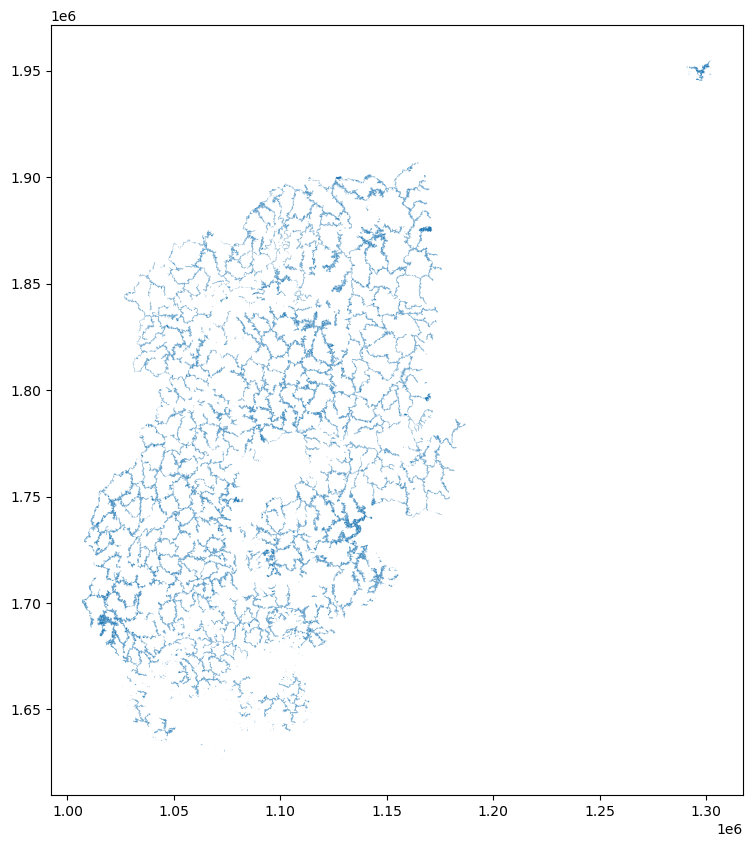

In [76]:
# The forestry information that belongs to the boundaries with other areas is still left unclassified.
imsang_geo_notincluded.plot()
plt.show()

In [77]:
## Reclassify approximately 60,000 forestry map information, including the boundaries of cities, using geo-information from other cities that share boundaries with the Gyeongsang Provinces.
umd_total = 'bnd_dong_00_2020_2020_2Q.shp'
umd_total = gpd.read_file(umd_total, encoding = 'utf-8')

adm_cd_boundary = pd.read_csv('adm_cd_boundary.csv', encoding = 'cp949')
adm_cd_boundary = pd.DataFrame(adm_cd_boundary['ADM_DR_CD'])

umd_total['ADM_DR_CD']=umd_total['ADM_DR_CD'].astype(int)
adm_cd_boundary['ADM_DR_CD']=adm_cd_boundary['ADM_DR_CD'].astype(int)

umd_boundary_df = pd.merge(adm_cd_boundary, umd_total, how='left', on='ADM_DR_CD')

umd_boundary_df = umd_boundary_df.reindex(columns=['BASE_DATE', 'ADM_DR_CD', 'ADM_DR_NM', 'geometry'])

umd_both = pd.concat([umd, umd_boundary_df], axis=0, ignore_index=True)

In [78]:
# Extract forestry information indices located at the boundaries of each town(umd)
imsang_intersect_list = []
for i in range(0,1214):
    imsang_intersect_match = imsang_geo_notincluded.intersects(umd_both.loc[i,'geometry'])
    imsang_intersect_index = imsang_intersect_match[imsang_intersect_match==True]
    imsang_intersect_list.append(imsang_intersect_index.index)
    
imsang_notincluded_data = []
for i in range(0,1214):
    data = imsang.loc[imsang_intersect_list[i],:]
    data['region'] = umd_both['ADM_DR_CD'][i]
    # store DataFrame in list
    imsang_notincluded_data.append(data)

imsang_notincluded_data = pd.concat(imsang_notincluded_data)

In [79]:
# the number of forestry information indices for each town(umd)
imsang_intersect_count = []
for i in range(0,1214):
    imsang_intersect_count.append(len(imsang_intersect_list[i]))

# Towns(umd) that have no forestry information indices
imsang_intersect_count_0 = [i for i, x in enumerate(imsang_intersect_count) if x==0]

# Towns(umd) that have no forestry information (#: 37)
umd_both_noinfo = umd_both.iloc[imsang_intersect_count_0,:]
umd_both_noinfo = umd_both_noinfo.iloc[0:37,]

In [80]:
umd_remove = [2108054, 2111067, 2112056, 2131012, 2131013, 2202062,
       2202071, 2202074, 2202075, 2205071, 2205075, 2205076, 2205083,
       2206071, 2231013, 2231014, 2231016, 2231031, 2231032, 2231036,
       2604052, 2604053, 2604054, 2631013, 2631014, 2631034, 2631036,
       2631037, 2631038, 2631039, 2631040]

imsang_notincluded_data2 = imsang_notincluded_data.loc[~imsang_notincluded_data['region'].isin(umd_remove)]
imsang_notincluded_data2.shape

(117907, 13)

In [81]:
## Still handling the remaining rows
imsang_id = [imsang_included_data.index.unique(),imsang_notincluded_data2.index.unique()]
imsang_id_flatten = list(itertools.chain.from_iterable(imsang_id))
imsang_flatten_num = pd.to_numeric(imsang_id_flatten)

# The outermost boundary sections remain.
final_notincluded = imsang.loc[~imsang.index.isin(imsang_flatten_num)]
final_notincluded.shape

(8, 12)

In [82]:
# Extract the remaining forestry geo-information from the outer boundary by calculating the distance from each town(umd) and matching it with the nearest town
imsang_final_notincluded_list = []
for i in range(0,8):
    distances_min = umd['geometry'].distance(final_notincluded.iloc[i]['geometry']).min()
    distances_umd_index = umd[umd.distance(final_notincluded.iloc[i]['geometry'])==distances_min].index
    imsang_final_notincluded_list.append(distances_umd_index.values)

In [83]:
imsang_final_notincluded_list_df = pd.DataFrame(imsang_final_notincluded_list, columns=['umd_index'])
imsang_final_notincluded_list_df.set_index(final_notincluded.index, inplace=True)

imsang_final_notincluded_data = pd.concat([final_notincluded, imsang_final_notincluded_list_df], axis=1)

In [84]:
umd2 = umd.copy()
umd2['umd_index'] = range(0,637)
umd2.drop(['BASE_DATE', 'ADM_DR_NM', 'geometry'], axis=1, inplace=True)
imsang_final_notincluded_data2 = pd.merge(imsang_final_notincluded_data, umd2, how='left', on='umd_index')
imsang_final_notincluded_data2.drop(['umd_index'], axis=1, inplace=True)
imsang_final_notincluded_data2.rename(columns={'ADM_DR_CD': 'region'}, inplace=True)
imsang_final_notincluded_data2.set_index(final_notincluded.index, inplace=True)

# Combine all
imsang_final = pd.concat([imsang_included_data, imsang_notincluded_data2, imsang_final_notincluded_data2], axis=0, ignore_index=False)

In [85]:
# Towns(umd) that have no information (#: 12)
imsang_noinfo = list(set(umd['ADM_DR_CD']).difference(set(imsang_final['region'])))

# Dataframe of towns(umd) that have no information
imsang_noinfo_index = umd['ADM_DR_CD'].isin(imsang_noinfo)
imsang_noinfo_df = umd.iloc[imsang_noinfo_index[imsang_noinfo_index==True].index,:]

# imsang_final.to_csv('imsang_final.csv')

### Extract the geo-information of towns(umd) that have no information from the towns(umd) that share the geo-boundaries

In [86]:
imsang_final = pd.read_csv('imsang_final.csv')

noinfoumd_index = [12,13,28,41,50,108,118,211,348,351,456,504]
imsang_noinfoumd = umd.iloc[noinfoumd_index,:]

In [87]:
# Extract the indices of umd-s that share geo-boundaries with the umd-s that have no information.
noinfo_intersect_list = []
for i in imsang_noinfoumd.index:
    noinfo_intersect_match = umd.intersects(imsang_noinfoumd.loc[i,'geometry'])
    noinfo_intersect_index = noinfo_intersect_match[noinfo_intersect_match==True]
    noinfo_intersect_list.append(noinfo_intersect_index.index)

In [88]:
imsang_noinfo_filled_data = pd.DataFrame([])

for i in range(0,12):
    intersect_codes = pd.to_numeric(umd.loc[noinfo_intersect_list[i],'ADM_DR_CD'])
    intersect_codes_match = intersect_codes.isin(imsang_final['region'])
    intersect_codes_match_index = intersect_codes_match[intersect_codes_match==True].index
    intersect_codes_match_cd = pd.to_numeric(umd.loc[intersect_codes_match_index,'ADM_DR_CD'].values)
    
    noinfo_filled = imsang_final.loc[imsang_final['region'].isin(intersect_codes_match_cd)]
    noinfo_filled['region'] = imsang_noinfoumd.loc[imsang_noinfoumd.index[i],'ADM_DR_CD']
    imsang_noinfo_filled_data = imsang_noinfo_filled_data.append(noinfo_filled, ignore_index = False)

/var/folders/0x/0qlly95x41d2f03pf55mm_wc0000gn/T/ipykernel_3690/3085233461.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noinfo_filled['region'] = imsang_noinfoumd.loc[imsang_noinfoumd.index[i],'ADM_DR_CD']
/var/folders/0x/0qlly95x41d2f03pf55mm_wc0000gn/T/ipykernel_3690/3085233461.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imsang_noinfo_filled_data = imsang_noinfo_filled_data.append(noinfo_filled, ignore_index = False)
/var/folders/0x/0qlly95x41d2f03pf55mm_wc0000gn/T/ipykernel_3690/3085233461.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [ ]:
# imsang_noinfo_filled_data.to_csv('imsang_noinfo_filled.csv')

In [89]:
# Combine with the final version of "imsang_final"
imsang_final2 = pd.concat([imsang_final, imsang_noinfo_filled_data], axis=0, ignore_index=True)
imsang_final2.head()

Unnamed: 0  STORUNST  FROR_CD  FRTP_CD  KOFTR_GROU  DMCLS_CD  AGCLS_CD  \
0           4         0        0        0          91       NaN       NaN   
1           5         0        0        0          91       NaN       NaN   
2          10         0        0        0          91       NaN       NaN   
3          57         0        0        0          93       NaN       NaN   
4          97         0        0        0          93       NaN       NaN   

  DNST_CD  HEIGHT LDMARK_STN MAP_LABEL ETC_PCMTT  \
0     NaN     NaN     J00091         S       NaN   
1     NaN     NaN     J00091         S       NaN   
2     NaN     NaN     J00091         S       NaN   
3     NaN     NaN     J00093         C       NaN   
4     NaN     NaN     J00093         C       NaN   

                                            geometry   region  
0  POLYGON ((1185031.074632699 1781249.756374323,...  3701111  
1  POLYGON ((1181005.7221276 1773371.517068289, 1...  3701111  
2  POLYGON ((1182527.319852174 1778166.901144756,...  3701111  
3  POLYGON ((1184576.638823284 1779298.292251279,...  3701111  
4  POLYGON ((1186393.104874789 1781199.301022962,...  3701111

### Generate variables

For the towns(umd) with forestry information, use groupby on imsang_final.csv to extract the information.

For the towns(umd) without forestry information, use groupby on imsang_noinfo_filled_data.csv to extract the information.

In [91]:
imsang_final = pd.read_csv('imsang_final.csv')
imsang_noinfo_final = pd.read_csv('imsang_noinfo_filled.csv')

imsang_noinfo_final.drop(['Unnamed: 0.1'], axis=1, inplace=True)
imsang_final2 = pd.concat([imsang_final, imsang_noinfo_final], axis=0, ignore_index=True)

In [92]:
## Reorganize the toyang_final2 data by excluding the information of cities that share the geo-boundaries with Gyeongsang provinces but do not belong to them
umd_remove2 = [3205055, 3205056, 3205062, 3207012, 3207035,
       3233012, 3233038, 3302032, 3303034, 3303035, 3332031, 3332033,
       3332040, 3333035, 3334031, 3334032, 3334033, 3334034, 3334035,
       3336033, 3336034, 3336036, 3338011, 3338031, 3338032, 3338033,
       3338034, 3505043, 3505044, 3505045, 3533031, 3533032, 3533034,
       3534032, 3534033, 3534036, 3633033]

imsang_final3 = imsang_final2.loc[~imsang_final2['region'].isin(umd_remove2)]

In [95]:
imsang_vars = imsang_final3.loc[:,['STORUNST', 'FROR_CD', 'FRTP_CD', 'KOFTR_GROU','DMCLS_CD','AGCLS_CD', 'DNST_CD', 'HEIGHT', 'LDMARK_STN', 'MAP_LABEL', 'region']]
imsang_vars[['DMCLS_CD', 'AGCLS_CD', 'DNST_CD', 'HEIGHT']] = imsang_vars[['DMCLS_CD', 'AGCLS_CD', 'DNST_CD', 'HEIGHT']].astype(str) 
imsang_vars_cate = imsang_vars.groupby('region').agg(lambda x:x.value_counts().index[0]).reset_index()

# imsang_vars.to_csv('imsang_vars_r.csv')
# imsang_vars_cate.to_csv('imsang_vars_total.csv')

imsang_vars_total = pd.read_csv('imsang_vars_total.csv')

In [97]:
# Use forestry map information for towns(umd) without soil map information
# Additional data handling for the town(umd) information

toyang_noinfo_umd_cd = [3743011, 3743031, 3743032, 3805034, 3805036]
toyang_noinfo_umd = imsang_vars_total[imsang_vars_total['region'].isin(toyang_noinfo_umd_cd)]

imsang_temp = pd.DataFrame(imsang_vars_total,
                  columns = ['region','FROR_CD', 'FRTP_CD', 'KOFTR_GROU', 'DMCLS_CD', 'AGCLS_CD', 'DNST_CD', 'HEIGHT', 'LDMARK_STN'])
imsang_duplicate = imsang_temp[imsang_temp.duplicated(subset=['FROR_CD', 'FRTP_CD', 'KOFTR_GROU', 'DMCLS_CD', 'AGCLS_CD', 'DNST_CD', 'HEIGHT', 'LDMARK_STN'])]
imsang_duplicate.head()

region  FROR_CD  FRTP_CD  KOFTR_GROU  DMCLS_CD  AGCLS_CD DNST_CD  HEIGHT  \
3   3701131        2        2          30       2.0       4.0       C    14.0   
5   3701133        2        2          30       2.0       4.0       C    14.0   
12  3701160        2        1          30       2.0       4.0       C    12.0   
13  3701161        2        2          30       1.0       3.0       C    12.0   
17  3701233        2        1          11       2.0       4.0       C    10.0   

   LDMARK_STN  
3      J12230  
5      J12230  
12     J12230  
13     J12230  
17     J12111

### Visualization based on the organized dataframe

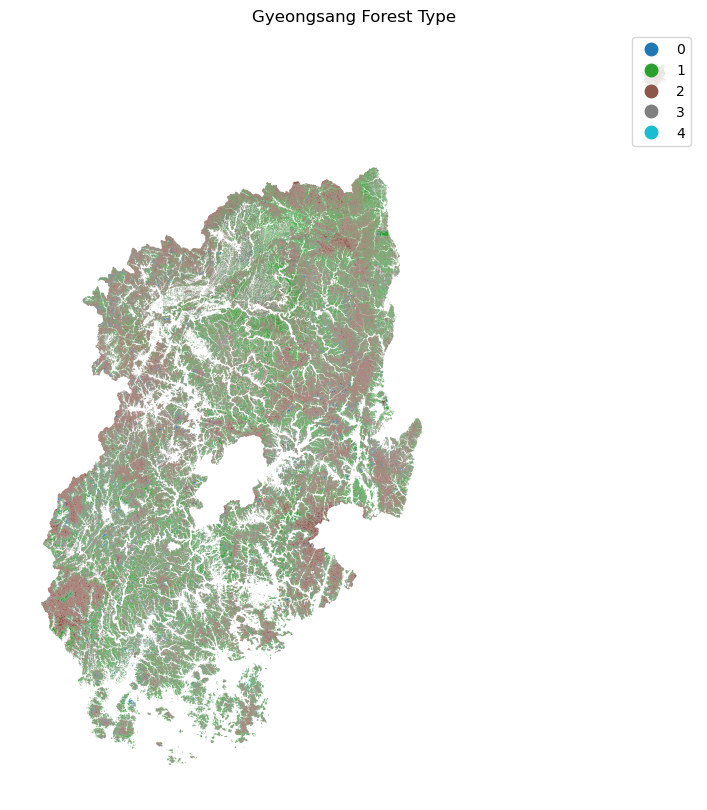

In [98]:
# forest type
imsang_frtp = imsang.plot(column='FRTP_CD', legend=True, categorical=True)
imsang_frtp.set_axis_off()
imsang_frtp.set_title("Gyeongsang Forest Type")
plt.show()

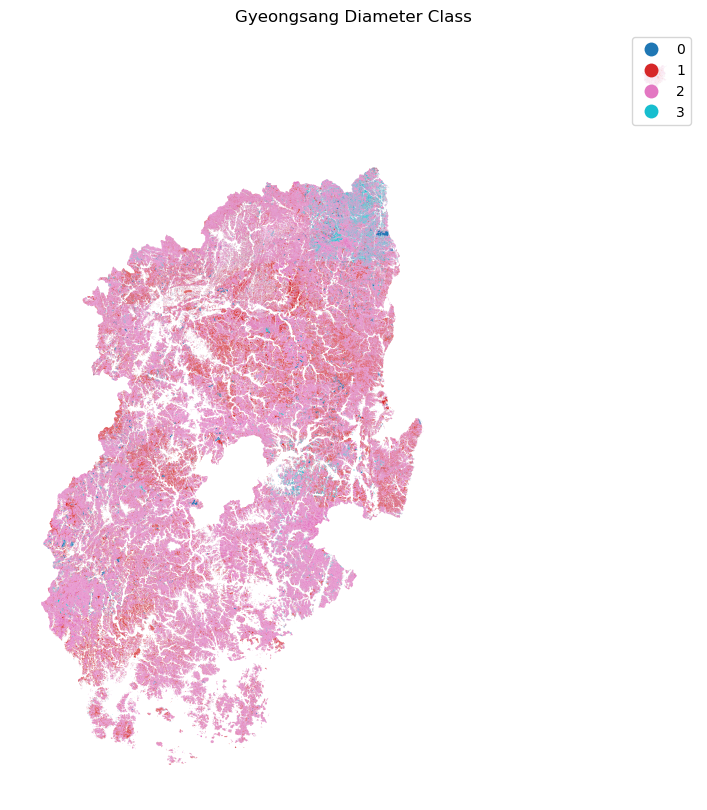

In [99]:
# diameter class
imsang_dmcls = imsang.plot(column='DMCLS_CD', legend=True, categorical=True)
imsang_dmcls.set_axis_off()
imsang_dmcls.set_title("Gyeongsang Diameter Class")
plt.show()

# Elaboration for both soil & forestry information

In [100]:
toyang_vars_total_filled = pd.read_csv('toyang_vars_total_filled.csv') # soil map
imsang_vars_total = pd.read_csv('imsang_vars_total.csv') # forestry map
soild = pd.read_csv('soild_groupby.csv')
lshistory_filled = pd.read_csv('lshistory_df_filled.csv', encoding = 'euc-kr') # occurrence record

In [101]:
# Exclude unused variables for the soil map
toyang_vars_total_filled2 = toyang_vars_total_filled.loc[:,['LOCTN_ALTT_mean', 'LOCTN_ALTT_min',
       'LOCTN_ALTT_25', 'LOCTN_ALTT_50', 'LOCTN_ALTT_75', 'LOCTN_ALTT_max',
       'LOCTN_GRDN_mean', 'LOCTN_GRDN_min', 'LOCTN_GRDN_25',
       'LOCTN_GRDN_50', 'LOCTN_GRDN_75', 'LOCTN_GRDN_max', 'EIGHT_AGL_mean',
       'EIGHT_AGL_min', 'EIGHT_AGL_25', 'EIGHT_AGL_50',
       'EIGHT_AGL_75', 'EIGHT_AGL_max', 'PRRCK_LARG', 'PRRCK_MDDL', 'CLZN_CD',
       'TPGRP_TPCD', 'PRDN_FOM_C', 'SLANT_TYP', 'SLDPT_TPCD', 'SCSTX_CD', 'SLTP_CD']]

# Exclude unused variables for the forestry map
imsang_vars_total2 = imsang_vars_total.loc[:,['STORUNST', 'FROR_CD', 'FRTP_CD', 'KOFTR_GROU',
                                              'DMCLS_CD', 'AGCLS_CD', 'DNST_CD', 'HEIGHT']]

# soil drain grade
soild2 = soild.loc[:,['SOILDRA1', 'SOILDRA2', 'SOILDRA3', 'SOILDRA4', 'SOILDRA5',
       'SOILDRA6', 'SOILDRA7']]

In [102]:
umd = pd.concat([umd, lshistory_filled.loc[:,'event'], toyang_vars_total_filled2, imsang_vars_total2, soild2], axis=1)
umd0 = umd[umd['event']==0]
umd1 = umd[umd['event']==1]

In [103]:
# Grouped version
soild['good'] = soild['SOILDRA1'] + soild['SOILDRA2'] + soild['SOILDRA3'] + soild['SOILDRA4']
soild['bad'] =  soild['SOILDRA5'] + soild['SOILDRA6']
soild['good_ratio'] = soild['good']/(soild['good'] + soild['bad'])
soild['bad_ratio'] = soild['bad']/(soild['good'] + soild['bad'])
umd['good'] = soild['good_ratio']
umd['bad'] = soild['bad_ratio']

### Visualization of comparing the geo-information between regions with and without a history of landslides

In [123]:
data = pd.read_csv('data_210138.csv')
umd_lshistory = pd.read_csv('umd_lssum.csv')
umd_new = umd.rename(columns={'ADM_DR_CD': 'umdcode'})

# Mark 1 for umd where landslides have occurred in the past
umd_lshistory.loc[umd_lshistory['sum_cnt']>=1, 'sum_cnt'] = 1

In [151]:
data_eda = data.drop_duplicates(subset = ["umdcode"]).reset_index()
data_eda.drop('index', axis=1, inplace=True)
data_total = pd.concat([umd_new, data_eda], axis=1)
data_total2 = pd.concat([data_total, umd_lshistory], axis=1)
data_new = data_total2.copy()

data_new.head()

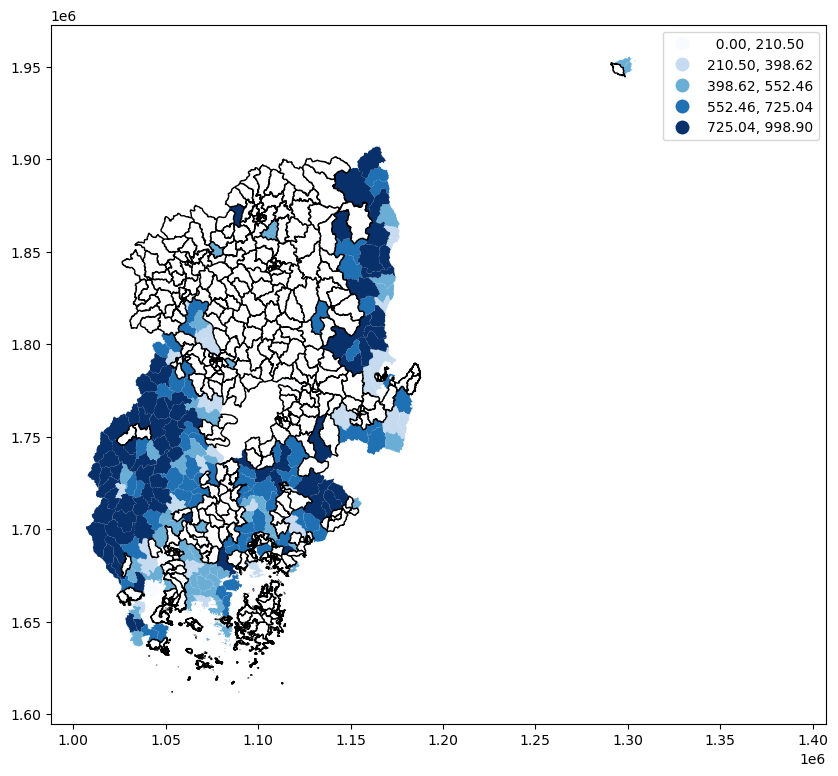

In [131]:
# elevation1
fig, ax = plt.subplots()
ax.set_aspect('equal')
data_new.plot(ax=ax, column='LOCTN_ALTT_dif', legend=True, scheme='quantiles', cmap="Blues", k=5)
umd0.plot(ax=ax, color='white', edgecolor='black')
plt.show()

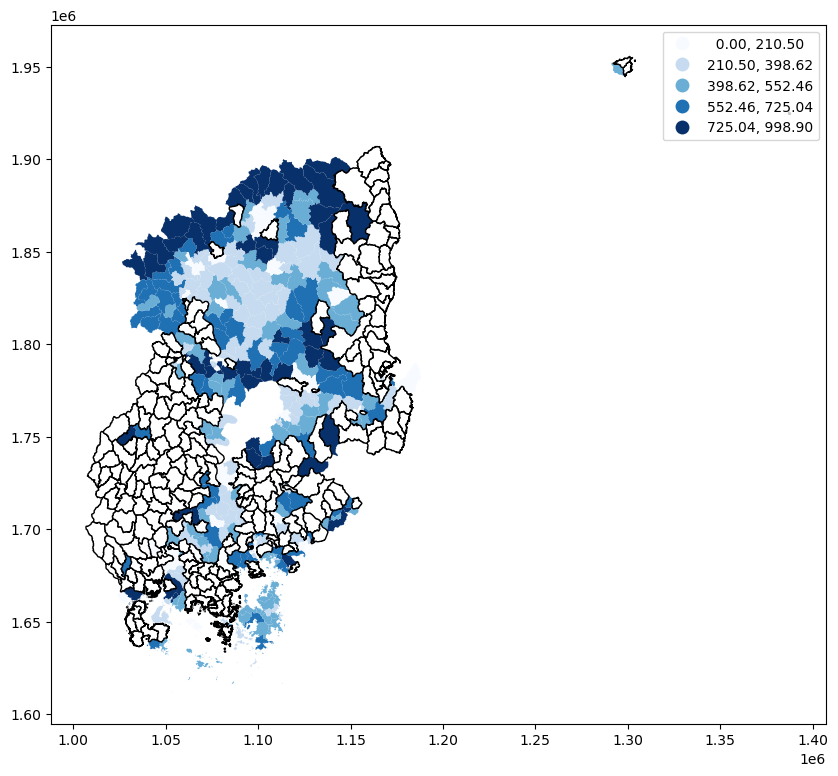

In [132]:
# elevation0
fig, ax = plt.subplots()
ax.set_aspect('equal')
data_new.plot(ax=ax, column='LOCTN_ALTT_dif', legend=True, scheme='quantiles', cmap="Blues", k=5)
umd1.plot(ax=ax, color='white', edgecolor='black')
plt.show()

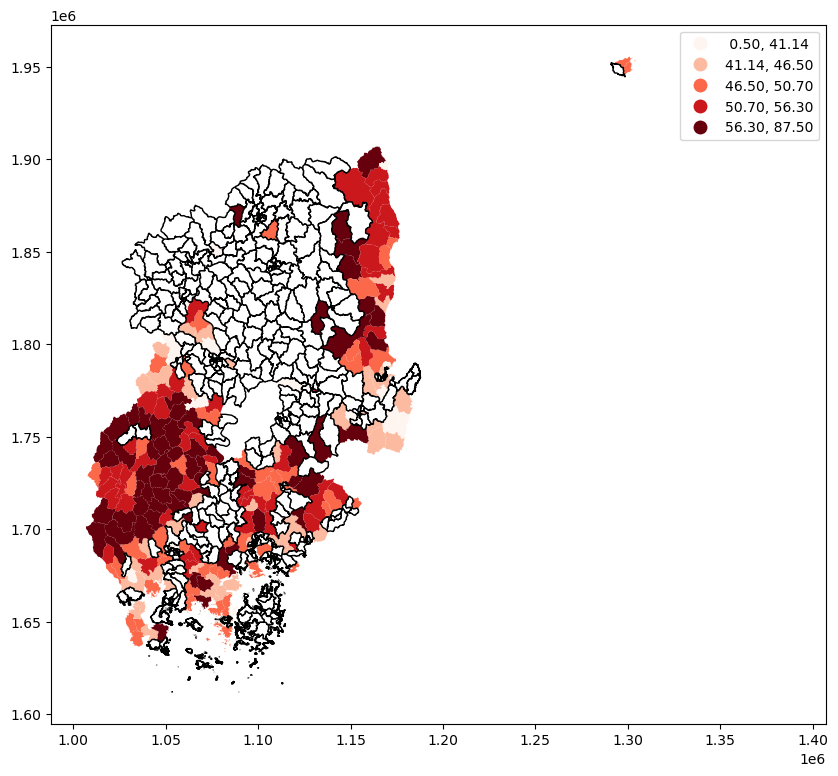

In [133]:
# gradient1
fig, ax = plt.subplots()
ax.set_aspect('equal')
data_new.plot(ax=ax, column='LOCTN_GRDN_max', legend=True, scheme='quantiles', cmap="Reds", k=5)
umd0.plot(ax=ax, color='white', edgecolor='black')
plt.show()

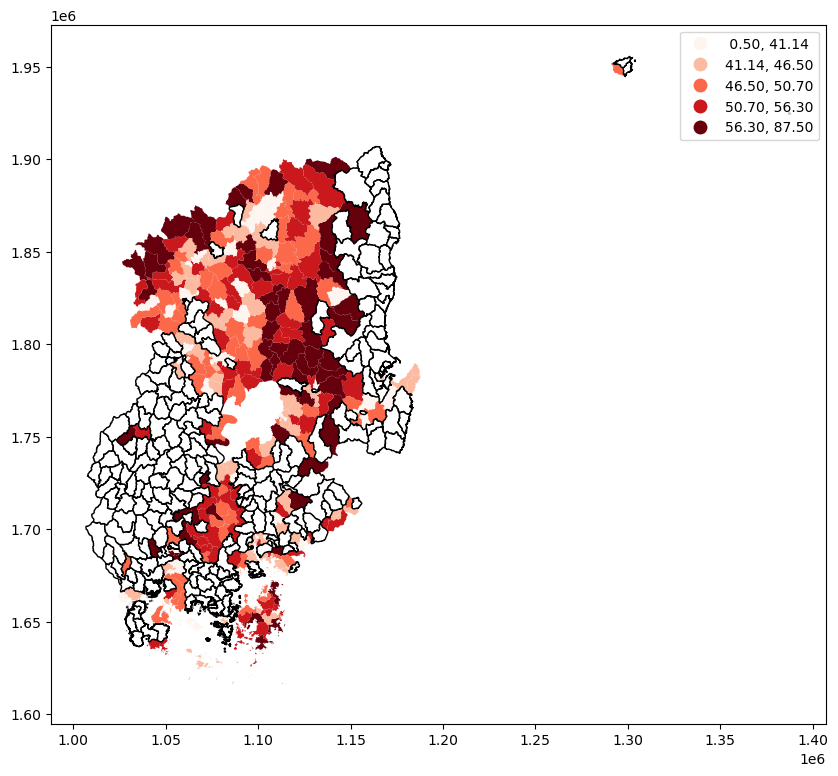

In [134]:
# gradient0
fig, ax = plt.subplots()
ax.set_aspect('equal')
data_new.plot(ax=ax, column='LOCTN_GRDN_max', legend=True, scheme='quantiles', cmap="Reds", k=5)
umd1.plot(ax=ax, color='white', edgecolor='black')
plt.show()

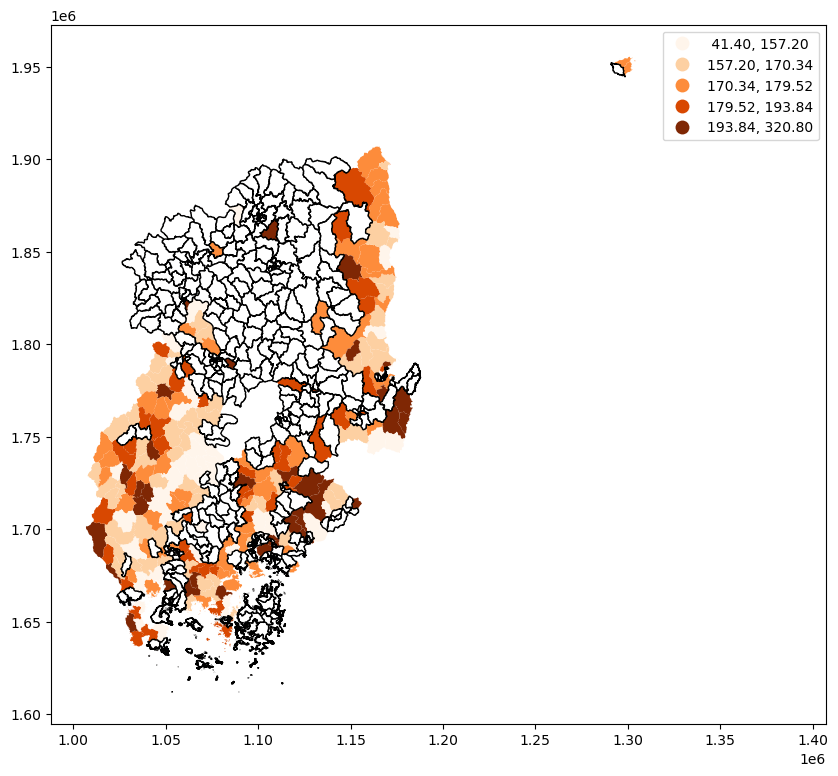

In [135]:
# angle1
fig, ax = plt.subplots()
ax.set_aspect('equal')
data_new.plot(ax=ax, column='EIGHT_AGL_50', legend=True, scheme='quantiles', cmap="Oranges", k=5)
umd0.plot(ax=ax, color='white', edgecolor='black')
plt.show()

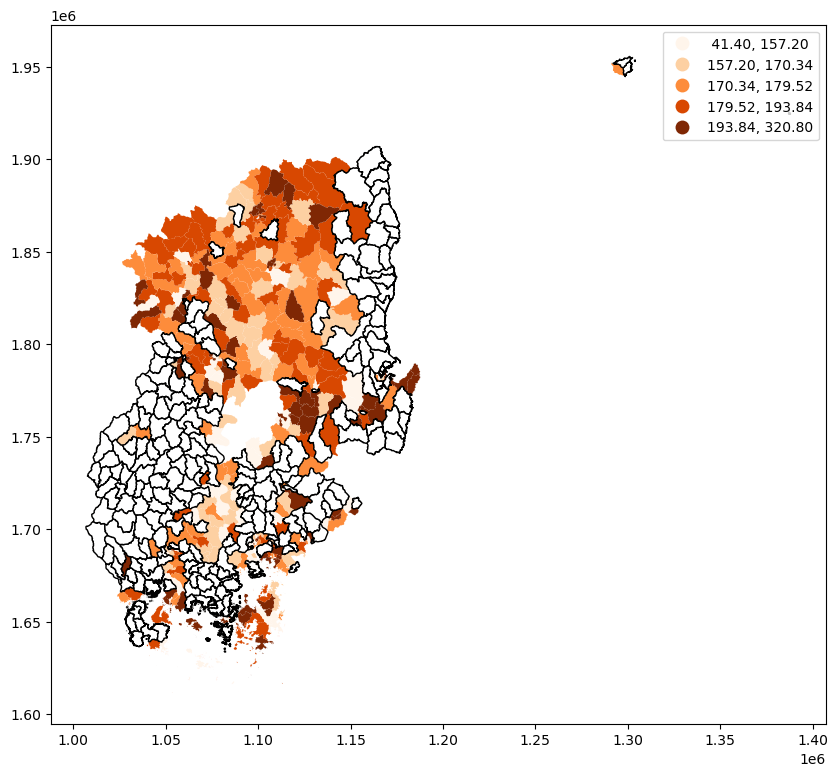

In [136]:
# angle0
fig, ax = plt.subplots()
ax.set_aspect('equal')
data_new.plot(ax=ax, column='EIGHT_AGL_50', legend=True, scheme='quantiles', cmap="Oranges", k=5)
umd1.plot(ax=ax, color='white', edgecolor='black')
plt.show()